In [170]:
import pandas as pd #para manipular matrices
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para graficar

In [171]:
fp = "Lionel Messi - All Club Goals.csv" #le doy a una variable el nombre del archivo
df = pd.read_csv(fp, encoding='latin1') #Leo el archivo
# Diccionario de mapeo para corregir nombres
competition_mapping = {
    'Troph?e des Champions': 'Trophée des Champions',
    'Champions League': 'UEFA Champions League',
}

# Reemplazar nombres en la columna 'Competition'
df["Competition"] = df["Competition"].replace(competition_mapping)

print(df.head()) #Muestro las primeras 5 filas

  Season            Competition     Matchday      Date Venue          Club  \
0  04-05                 LaLiga           34  01-05-05     H  FC Barcelona   
1  05-06  UEFA Champions League  Group Stage  02-11-05     H  FC Barcelona   
2  05-06                 LaLiga           13  27-11-05     H  FC Barcelona   
3  05-06                 LaLiga           19  15-01-06     H  FC Barcelona   
4  05-06                 LaLiga           20  22-01-06     H  FC Barcelona   

               Opponent Result Playing_Position Minute              Type  \
0     Albacete Balompie   2:00               CF   90+1  Left-footed shot   
1  Panathinaikos Athens   5:00               RW     34  Left-footed shot   
2      Racing Santander   4:01               RW     51  Left-footed shot   
3       Athletic Bilbao   2:01               RW     50  Left-footed shot   
4      Deportivo Alaves   2:00               CF     82  Left-footed shot   

         Goal_assist  
0  Ronaldinho Gaacho  
1                NaN  
2    

In [172]:
print(df.columns)

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'Type',
       'Goal_assist'],
      dtype='object')


In [173]:
print(df["Competition"].unique())

['LaLiga' 'UEFA Champions League' 'Copa del Rey' 'Supercopa'
 'FIFA Club World Cup' 'UEFA Super Cup' 'Ligue 1' 'Trophée des Champions']


In [174]:
print(df.isnull()) #Verifico si hay valores nulos

     Season  Competition  Matchday   Date  Venue   Club  Opponent  Result  \
0     False        False     False  False  False  False     False   False   
1     False        False     False  False  False  False     False   False   
2     False        False     False  False  False  False     False   False   
3     False        False     False  False  False  False     False   False   
4     False        False     False  False  False  False     False   False   
..      ...          ...       ...    ...    ...    ...       ...     ...   
699   False        False     False  False  False  False     False   False   
700   False        False     False  False  False  False     False   False   
701   False        False     False  False  False  False     False   False   
702   False        False     False  False  False  False     False   False   
703   False        False     False  False  False  False     False   False   

     Playing_Position  Minute   Type  Goal_assist  
0               False  

In [175]:
df.loc[df["Season"] == "11-Dec", "Season"] = "11-12" #Reemplazo los valores que estan en el formato incorrecto
df.loc[df["Season"] == "Dec-13", "Season"] = "12-13"
goals_by_season = df.groupby("Season").size().reset_index(name="goals") #Agrupo golesXtemporada
print(goals_by_season.head) #Veo que se haya hecho bien

<bound method NDFrame.head of    Season  goals
0   04-05      1
1   05-06      8
2   06-07     17
3   07-08     16
4   08-09     38
5   09-10     47
6   10-11     53
7   11-12     73
8   12-13     60
9   13-14     41
10  14-15     58
11  15-16     41
12  16-17     54
13  17-18     45
14  18-19     51
15  19-20     31
16  20-21     38
17  21-22     14
18  22-23     18>


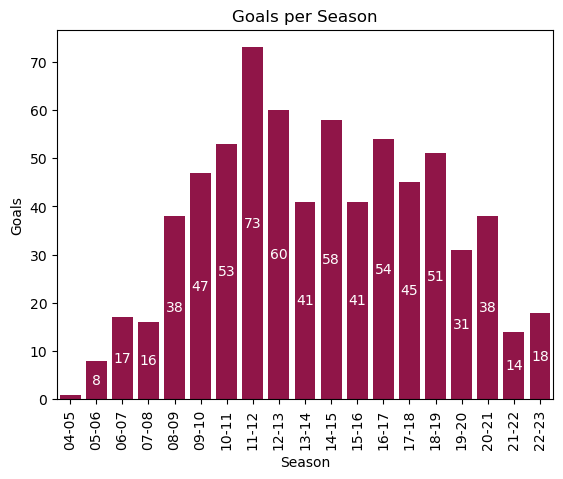

In [176]:
plt.Figure(figsize=(10,6)) #Creo una figura de tamaño 10x6
ax = sns.barplot(data=goals_by_season, x="Season", y="goals", color="#A50044")
ax.set_title("Goals per Season")
ax.set_xlabel("Season")
ax.set_ylabel("Goals")
plt.xticks(rotation=90)
for i,bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    if (height >5):
        plt.gca().text(bar.get_x() + bar.get_width()/2., height/2, int(height), ha='center', va='center', color='w')
plt.show()

In [177]:
top_assistants = df.groupby("Goal_assist").size().reset_index(name="Assistant") #Agrupo asistencias por goles
ta_sorted = top_assistants.sort_values(by="Assistant", ascending=False) #Ordeno por cantidad de asistencias
print(ta_sorted[0:5]) #Mostramos las primeras 5 asistencias

       Goal_assist  Assistant
38     Luis Suarez         48
17      Dani Alves         42
7   Andres Iniesta         39
67            Xavi         34
47          Neymar         30


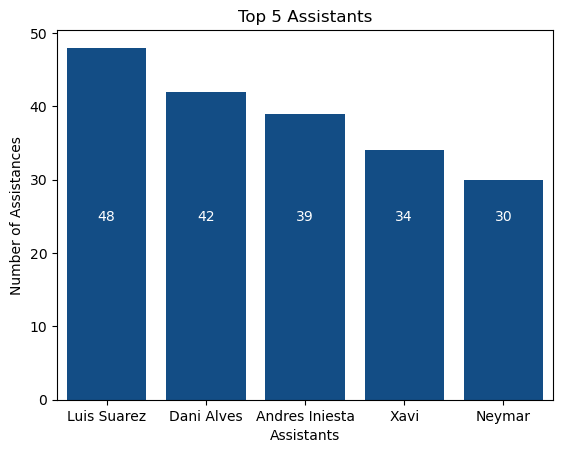

In [178]:
plt.Figure(figsize=(10,6)) #Creo una figura de tamaño 10x6
bx = sns.barplot(data=ta_sorted[0:5], y="Assistant", x="Goal_assist", color="#004D98")
bx.set_title("Top 5 Assistants")
bx.set_xlabel("Assistants")
bx.set_ylabel("Number of Assistances")
for i, bar in enumerate(bx.patches):
    height2 = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 24, int(height2), ha='center', va='bottom', color='w')
plt.show()

In [179]:
gxposition = df.Playing_Position.value_counts().sort_values(ascending=False).reset_index("Playing_Position") #Agrupo
gxp_top5 = gxposition[0:5] #Selecciono las primeras 5
gxp_rest = gxposition[5:] #Selecciono las restantes
total_rest = gxp_rest["count"].sum() #Sumo las columnas restantes
gxp_other = pd.DataFrame({"Playing_Position" : ["Other"], "count" : [total_rest]}) #Agrego a la tabla 
gxp_final = pd.concat([gxp_top5, gxp_other]) #concateno
print(gxp_final) 

  Playing_Position  count
0               CF    276
1               RW    221
2              RW      95
3              CF      40
4              SS      32
0            Other     40


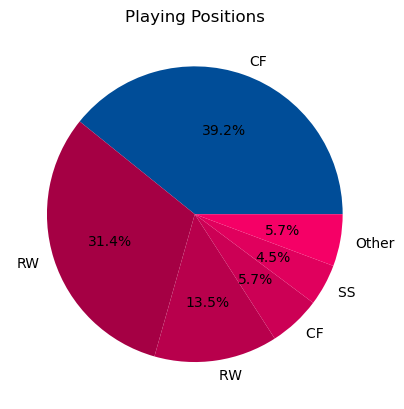

In [199]:
plt.Figure(figsize=(10,6))
colors= ['#004D98','#A50044','#B8004C','#CC0055','#E0005D','#F50066']
plt.pie(gxp_final["count"], labels=gxp_final["Playing_Position"], autopct='%1.1f%%',colors=colors) 
plt.title("Playing Positions")
plt.show()

                  Club  Goal per team
0         FC Barcelona            672
1  Paris Saint-Germain             32


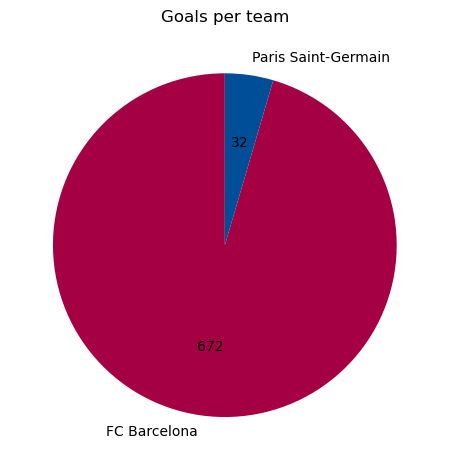

In [196]:
gxt = df.groupby(['Club']).size().reset_index(name='Goal per team')
labels = gxt['Club'].tolist()  # Nombres de los equipos
values = gxt['Goal per team'].tolist()  # Número de goles por equipo
colors = ['#A50044', '#004D98']
print(gxt)
plt.Figure(figsize=(10,6))
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    colors=colors,
    autopct=lambda pct:'',
    textprops=dict(color='black'),
    startangle=90)
for i, text in enumerate(autotexts):
    text.set_text(f"{values[i]}")
plt.title('Goals per team')
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

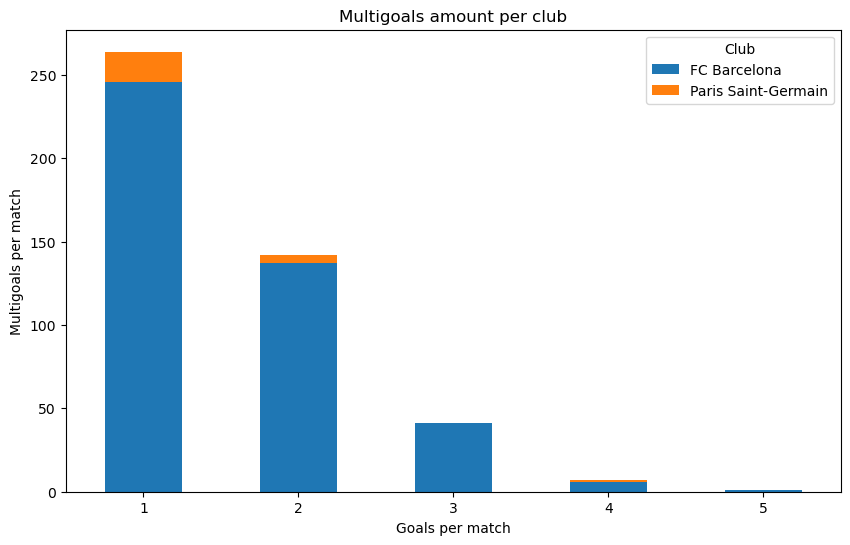

In [188]:
gxm = df.groupby(["Date","Opponent", "Club"]).size().reset_index(name="Goals per match") #Agrupo golesXpartido
gxm2 = gxm.groupby(["Goals per match", "Club"]).size().reset_index(name="Multigoals per match") #Agrupo multigolesXpartido
#print(gxm2) #Veo que se haya hecho bien 
pivot1= gxm2.pivot(index="Goals per match", columns="Club", values="Multigoals per match") #Pivoto
pivot1.plot(kind="bar", stacked=True, figsize=(10,6), title="Multigoals per match per club") #Grafico
plt.title("Multigoals amount per club")
plt.xlabel("Goals per match")
plt.ylabel("Multigoals per match")
plt.xticks(rotation=0)